<h1 style="text-align:center;">Sprint 3: Tarea 2- Estructuras Dataframes</h1>

In [14]:
#importamos librerias
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None 

**EJERCICIO 1**: Descarga el fecha siete Airlines Delay: Airline on-time statistics and delay causas y cárgalo en un Pandas Dataframe. Explora los datos que contiene, explica brevemente qué variables existen y queda únicamente con las columnas que consideres relevantes. Justifica tu elección.

In [2]:
#Descargada datos desde la url: https://www.kaggle.com/giovamata/airlinedelaycauses
df = pd.read_csv('DelayedFlights.csv', index_col=0)

In [3]:
#Reduce la dimensión del dataset de forma aleatoria para obtener un dataset de sólo 200.000 registros.
df = df.sample(n=200000, random_state=1)

In [4]:
df.columns 

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [5]:
#Analiza la estructura del dataset y selecciona variables que se puedan utilizar para hacer una matriz de correlación.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200000 entries, 6516830 to 5395875
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               200000 non-null  int64  
 1   Month              200000 non-null  int64  
 2   DayofMonth         200000 non-null  int64  
 3   DayOfWeek          200000 non-null  int64  
 4   DepTime            200000 non-null  float64
 5   CRSDepTime         200000 non-null  int64  
 6   ArrTime            199208 non-null  float64
 7   CRSArrTime         200000 non-null  int64  
 8   UniqueCarrier      200000 non-null  object 
 9   FlightNum          200000 non-null  int64  
 10  TailNum            199999 non-null  object 
 11  ActualElapsedTime  199080 non-null  float64
 12  CRSElapsedTime     199982 non-null  float64
 13  AirTime            199080 non-null  float64
 14  ArrDelay           199080 non-null  float64
 15  DepDelay           200000 non-null  float64
 16  

<Axes: >

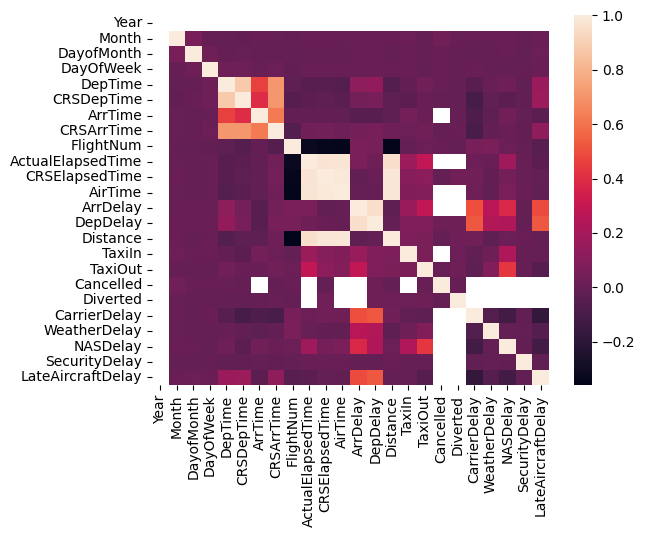

In [6]:
#Elimina las variables de tipo object.
df_ = df.select_dtypes(exclude=['object'])
#haz una matriz de correlación con las variables seleccionadas. y visualiza la matriz de correlación con un mapa de calor.
corr = df_.corr()

#Visualiza la matriz de correlación con un mapa de calor.
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

**Descripcion**: El dataset contiene información sobre los vuelos de las aerolíneas, en particular, el retraso de los vuelos y las causas de los mismos. El dataset contiene 29 columnas, las cuales incluyen las fechas, los aeropuertos, las aerolíneas, el tiempo de retraso, las causas de los retrasos, distancias, etc.

**Elección de columnas**: Elegiré las columnas de fecha, aeropuertos, aerolíneas, tiempo de retraso, causas de los retrasos, devios, cancelados y distancias. Con el fin de identificar las aerolíneas que tienen más retrasos, las causas de los mismos y las fechas en que ocurren estos retrasos.

In [7]:
data = df[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'UniqueCarrier', 'Origin', 'Dest', 'Distance', 'WeatherDelay', 'CarrierDelay', 'Diverted', 'ArrDelay', 'DepDelay', 'CancellationCode', 'Cancelled','NASDelay', 'LateAircraftDelay']]
data

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,Origin,Dest,Distance,WeatherDelay,CarrierDelay,Diverted,ArrDelay,DepDelay,CancellationCode,Cancelled,NASDelay,LateAircraftDelay
6516830,2008,12,19,5,WN,CLE,BWI,314,NaN,NaN,0,6.0,12.0,N,0,NaN,NaN
3577214,2008,6,17,2,CO,EWR,LAS,2227,0.0,11.0,0,18.0,11.0,N,0,7.0,0.0
148177,2008,1,27,7,YV,ORD,BNA,409,0.0,63.0,0,63.0,50.0,N,0,0.0,0.0
1035260,2008,2,13,3,9E,ORF,DTW,529,0.0,0.0,0,37.0,63.0,N,0,0.0,37.0
4599044,2008,8,12,2,FL,ATL,DEN,1199,0.0,13.0,0,30.0,13.0,N,0,17.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5763672,2008,10,27,1,MQ,ORD,BDL,783,0.0,0.0,0,167.0,159.0,N,0,8.0,159.0
5275042,2008,9,25,4,AA,ORD,LGA,733,0.0,0.0,0,150.0,82.0,N,0,150.0,0.0
2433686,2008,5,16,5,WN,OKC,DAL,181,NaN,NaN,0,7.0,10.0,N,0,NaN,NaN
6749307,2008,12,23,2,DL,CLT,ATL,227,NaN,NaN,0,8.0,10.0,N,0,NaN,NaN


**EJERCICIO 2**: Realiza un informe completo del dataset:

* Resume estadísticamente el dataset y las columnas de interés. Haz un análisis estadístico de lo que consideres relevante.
* Encuentra cuántos datos faltantes hay por columna.
* Crea nuevas columnas (velocidad media del vuelo, si ha llegado tarde o no...).
* Haz una tabla de las aerolíneas con mayores retrasos acumulados.
* ¿Cuáles son los vuelos más largos? ¿Y los más atrasados? Busca las rutas más largas y las que acumulen más retrasos.
* Aporta lo que consideres relevante.

In [8]:
#Resumen estadistico del dataset y las columnas
data.describe()

,Year,Month,DayofMonth,DayOfWeek,Distance,WeatherDelay,CarrierDelay,Diverted,ArrDelay,DepDelay,Cancelled,NASDelay,LateAircraftDelay
count,200000.0,200000.000000,200000.000000,200000.000000,200000.000000,128790.000000,128790.000000,200000.000000,199080.000000,200000.000000,200000.000000,128790.000000,128790.000000
mean,2008.0,6.107705,15.746745,3.986185,766.311470,3.696871,19.210335,0.004215,42.196253,43.241600,0.000385,15.055633,25.225872
std,0.0,3.475174,8.775472,1.993493,574.883162,21.240432,43.390607,0.064786,56.785793,53.446295,0.019618,33.606039,42.617552
min,2008.0,1.000000,1.000000,1.000000,24.000000,0.000000,0.000000,0.000000,-59.000000,6.000000,0.000000,0.000000,0.000000
25%,2008.0,3.000000,8.000000,2.000000,338.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
50%,2008.0,6.000000,16.000000,4.000000,607.000000,0.000000,2.000000,0.000000,24.000000,24.000000,0.000000,2.000000,8.000000
75%,2008.0,9.000000,23.000000,6.000000,998.000000,0.000000,21.000000,0.000000,56.000000,53.000000,0.000000,14.000000,33.000000
max,2008.0,12.000000,31.000000,7.000000,4962.000000,1070.000000,1951.000000,1.000000,1951.000000,1952.000000,1.000000,604.000000,1316.000000


**Descripcion**: Asumiendo que las unidades de las distancias estan en millas, los vuelos tienen distancias de entre 24 y 4962 millas.

In [19]:
#calculamos los datos faltantes por columna
data.isnull().sum()

DayOfWeek                0
UniqueCarrier            0
Origin                   0
Dest                     0
Distance                 0
WeatherDelay         71133
CarrierDelay         71133
Diverted                 0
ArrDelay               843
DepDelay                 0
CancellationCode         0
NASDelay             71133
LateAircraftDelay    71133
TotalDelay           71133
Fecha                    0
dtype: int64

In [16]:
#Asumire que el retraso de llegada de los vuelos es la suma de CarrierDelay, WeatherDelay, NASDelay y LateAircraftDelay.
#Creamos una nueva variable llamada TotalDelay que sea la suma de las variables mencionadas.
data['TotalDelay'] = data.CarrierDelay + data.WeatherDelay + data.NASDelay + data.LateAircraftDelay
data['Fecha'] = pd.to_datetime(data.Year*10000+data.Month*100+data.DayofMonth,format='%Y%m%d')
#eliminamos las variables Year, Month y DayofMonth.
data = data.drop(['Year', 'Month', 'DayofMonth'], axis=1)
data

,DayOfWeek,UniqueCarrier,Origin,Dest,Distance,WeatherDelay,CarrierDelay,Diverted,ArrDelay,DepDelay,CancellationCode,Cancelled,NASDelay,LateAircraftDelay,TotalDelay,Fecha
6516830,5,WN,CLE,BWI,314,NaN,NaN,0,6.0,12.0,N,0,NaN,NaN,NaN,2008-12-19
3577214,2,CO,EWR,LAS,2227,0.0,11.0,0,18.0,11.0,N,0,7.0,0.0,18.0,2008-06-17
148177,7,YV,ORD,BNA,409,0.0,63.0,0,63.0,50.0,N,0,0.0,0.0,63.0,2008-01-27
1035260,3,9E,ORF,DTW,529,0.0,0.0,0,37.0,63.0,N,0,0.0,37.0,37.0,2008-02-13
4599044,2,FL,ATL,DEN,1199,0.0,13.0,0,30.0,13.0,N,0,17.0,0.0,30.0,2008-08-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5763672,1,MQ,ORD,BDL,783,0.0,0.0,0,167.0,159.0,N,0,8.0,159.0,167.0,2008-10-27
5275042,4,AA,ORD,LGA,733,0.0,0.0,0,150.0,82.0,N,0,150.0,0.0,150.0,2008-09-25
2433686,5,WN,OKC,DAL,181,NaN,NaN,0,7.0,10.0,N,0,NaN,NaN,NaN,2008-05-16
6749307,2,DL,CLT,ATL,227,NaN,NaN,0,8.0,10.0,N,0,NaN,NaN,NaN,2008-12-23


In [17]:
#identificamos los vuelos cancelados y los eliminamos del dataset. Ya que los vuelos cancelados no tienen retraso.
data.Cancelled.value_counts()
data = data[data.Cancelled == 0]
data = data.drop(['Cancelled'], axis=1)
data

,DayOfWeek,UniqueCarrier,Origin,Dest,Distance,WeatherDelay,CarrierDelay,Diverted,ArrDelay,DepDelay,CancellationCode,NASDelay,LateAircraftDelay,TotalDelay,Fecha
6516830,5,WN,CLE,BWI,314,NaN,NaN,0,6.0,12.0,N,NaN,NaN,NaN,2008-12-19
3577214,2,CO,EWR,LAS,2227,0.0,11.0,0,18.0,11.0,N,7.0,0.0,18.0,2008-06-17
148177,7,YV,ORD,BNA,409,0.0,63.0,0,63.0,50.0,N,0.0,0.0,63.0,2008-01-27
1035260,3,9E,ORF,DTW,529,0.0,0.0,0,37.0,63.0,N,0.0,37.0,37.0,2008-02-13
4599044,2,FL,ATL,DEN,1199,0.0,13.0,0,30.0,13.0,N,17.0,0.0,30.0,2008-08-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5763672,1,MQ,ORD,BDL,783,0.0,0.0,0,167.0,159.0,N,8.0,159.0,167.0,2008-10-27
5275042,4,AA,ORD,LGA,733,0.0,0.0,0,150.0,82.0,N,150.0,0.0,150.0,2008-09-25
2433686,5,WN,OKC,DAL,181,NaN,NaN,0,7.0,10.0,N,NaN,NaN,NaN,2008-05-16
6749307,2,DL,CLT,ATL,227,NaN,NaN,0,8.0,10.0,N,NaN,NaN,NaN,2008-12-23


In [25]:
#aerolineas con mayores retrasos acumulados
df_delay_carriers= data.groupby('UniqueCarrier').TotalDelay.sum().sort_values(ascending=False)
#lo convwrtimos en un dataframe para poder graficarlo
df_delay_carriers = pd.DataFrame(df_delay_carriers)
df_delay_carriers

,TotalDelay
UniqueCarrier,
WN,1104949.0
AA,892151.0
UA,673090.0
MQ,634035.0
OO,598035.0
XE,518481.0
DL,458088.0
CO,420553.0
EV,382963.0


<Axes: xlabel='UniqueCarrier'>

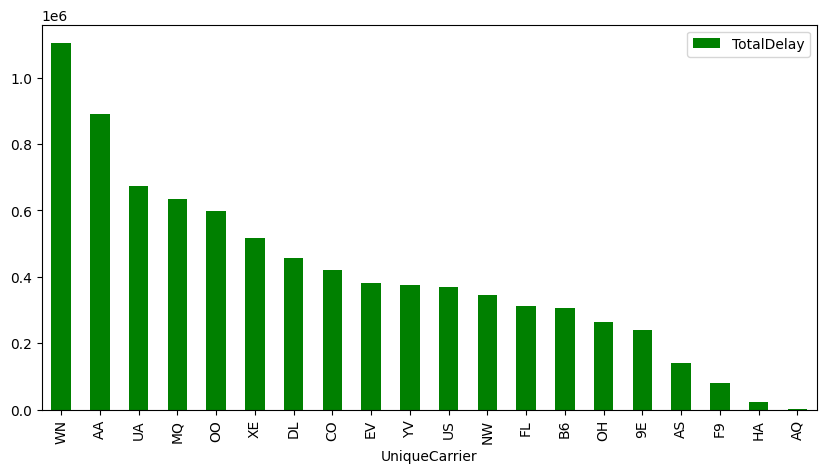

In [26]:
#Graficamos los retrasos acumulados por aerolinea
df_delay_carriers.plot(kind='bar', figsize=(10,5), color='green')

**Descripción**: Se observa que la aerolinea que más retrasos presenta es la aerolinea `WN`, seguida por la aerolinea `AA` y `UA`. Acumulando un total de 1104949.0, 892151.0, y 673090.0 minutos respectivamente

In [28]:
#idenficamos lo vuelos mas largos en funcion de Origen y Destino
df_long_flights = data.groupby(['Origin', 'Dest']).Distance.sum().sort_values(ascending=False)
df_long_flights = pd.DataFrame(df_long_flights)
df_long_flights

,,Distance
Origin,Dest,
SFO,JFK,618054
LAX,JFK,616275
JFK,LAX,603900
ORD,LAX,547930
JFK,SFO,532716
...,...,...
SAT,AUS,66
LAX,ONT,47
SNA,LAX,36


**Descripción**: Los vuelos más largos son los que van de `SFO` a `JFK` cubriendo un total de 618054 millas.`

In [29]:
#los vuelos que mayor retrazo tienen
df_delay_flights = data.groupby(['Origin', 'Dest']).TotalDelay.sum().sort_values(ascending=False)
df_delay_flights = pd.DataFrame(df_delay_flights)
df_delay_flights

,,TotalDelay
Origin,Dest,
ORD,LGA,25644.0
LGA,ORD,23093.0
LAX,SFO,22996.0
ORD,EWR,22267.0
ATL,EWR,21698.0
...,...,...
SJU,CLE,0.0
FAI,SLC,0.0
DFW,JAC,0.0


**Descripción**: Los vuelos más atrasados son los que van de `ORD` a `LGA` con un total de 25644.0 minutos de retraso.

In [30]:
#En que fecha del año se producen mas retrasos
df_delay_dates = data.groupby('Fecha').TotalDelay.sum().sort_values(ascending=False)
df_delay_dates = pd.DataFrame(df_delay_dates)
df_delay_dates

,TotalDelay
Fecha,
2008-11-30,71457.0
2008-12-23,68920.0
2008-12-19,68476.0
2008-12-21,65087.0
2008-12-27,61094.0
...,...
2008-11-23,4753.0
2008-10-18,4165.0
2008-11-28,3695.0


<Axes: xlabel='Fecha'>

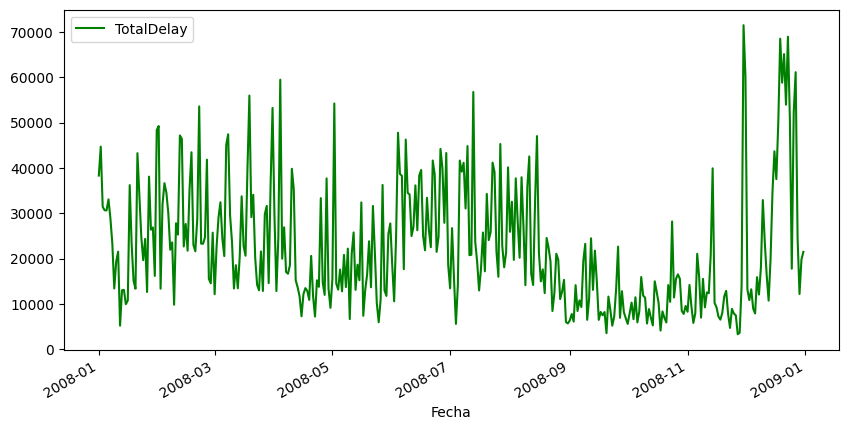

In [31]:
#Graficamos los retrasos acumulados por fecha
df_delay_dates.plot(kind='line', figsize=(10,5), color='green')

**Descripción**: Se observan los mayores retrasos durante el mes de diciembre, en particular, el 23 de diciembre. Esto se debe a que es una fecha cercana a la navidad. Tambien se observa un incremento en los retrasos de los vuelos durante mayo,junio con un pico en julio, agosto. Esto se debe a que es una fecha cercana a las vacaciones de verano.

**EJERCICIO 3**: Exporta el dataset limpio y con las nuevas columnas a Excel.

In [32]:
#Exportamos el dataset a un archivo excel
data.to_excel('data.xlsx')